In [4]:
from pptx import Presentation
import pandas as pd
import matplotlib.pyplot as plt
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
import os

In [5]:
dict_days = dict(zip(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], 
                     ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                    ))

## Workload per day (by Week)
### Import Data

In [6]:
# Volumes per day
df_day = pd.read_csv('volumes per day.csv', index_col=0)
# Weeks
LIST_WEEKS = df_day['WEEK'].unique()
df_day.head()

,DATE,WEEK,DAY,ORDERS,LINES,PCS,SKU,CITIES
0,2017-01-02,WEEK-1,MON,776,1367,1595.0,487,174
1,2017-01-03,WEEK-1,TUE,902,1550,1861.0,547,188
2,2017-01-04,WEEK-1,WED,1476,2252,2856.0,513,205
3,2017-01-05,WEEK-1,THU,909,1637,1972.0,519,175
4,2017-01-06,WEEK-1,FRI,1023,1720,1995.0,502,189


### Function to plot data

In [7]:
def analysis_week(df_day, WEEK):
    
    # Filter Scope
    df_plot = df_day[df_day['WEEK'] ==WEEK].copy()

    ''' Calculate KPIs for Comments'''
    # Lines per orders
    df_plot['LINES/ORDER'] = df_plot['LINES']/df_plot['ORDERS']
    avg_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].mean())
    max_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].max())

    # Maximum Day Lines
    busy_day = dict_days[df_plot.set_index('DAY')['LINES'].idxmax()]
    max_lines = '{:,} lines'.format(df_plot['LINES'].max())

    # Total Workload
    total_lines = '{:,} lines'.format(df_plot['LINES'].sum())

    # Bar Plot: Orders/Lines
    fig, ax = plt.subplots(figsize=(12, 6))
    df_plot.plot.bar(figsize=(8, 6), edgecolor='black', x='DAY', y=['ORDERS', 'LINES'], 
                     color=['tab:blue', 'tab:orange'], legend= True, ax = ax)
    plt.xlabel('DAY', fontsize = 12)
    plt.title('Workload per day (Lines/day)', fontsize = 12)
#     plt.show()

    # Save plot
    filename = WEEK + ".png"
    path_plot = filename
    fig.savefig(path_plot, dpi=fig.dpi)
    
    return avg_ratio, max_ratio, busy_day, max_lines, total_lines

## Number of Lines/Order (by Week)
### Import Data

In [8]:
# Volumes per day
df_lior = pd.read_csv('lines per day.csv', index_col=0)
COLS_IN = list(df_lior.columns[0:8])
df_lior.reset_index(inplace = True)
df_lior.head()

,WEEK,1,2,3,4,5,+
0,WEEK-1,5178,1265,501,304,162,494
1,WEEK-2,5930,1832,756,423,211,640
2,WEEK-3,5047,1490,717,360,176,550
3,WEEK-4,2681,753,283,190,105,301
4,WEEK-5,966,271,95,78,30,85


In [9]:
def plot_split(df_lior):
    
    # Bar Plot: split per lines per orders
    fig, ax = plt.subplots(figsize=(12, 6))
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[0], color='tab:blue', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[1], color='tab:red', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[2], color='tab:orange', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[3], color='darkblue', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[4], color='brown', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[5], color='grey', legend= True, ax = ax)
    plt.xlabel('Week', fontsize = 14)
    plt.ylabel('Number of Orders', fontsize = 14)
    plt.title('Split of orders by number of lines/order', fontsize = 14)
#     plt.show()

    # Save plot
    filename = 'SPLIT' + ".png"
    path_plot = filename
    fig.savefig(path_plot, dpi=fig.dpi)

    # Analysis
    orders = df_lior.sum(axis = 1).sum()
    total_orders = '{:,} orders'.format(orders)
    
    # Split full month
    df_an = pd.DataFrame(100 * df_lior.set_index('WEEK').sum(axis = 0)/orders)
    df_an.columns = ['%']
    LIST_ANALYSIS = []
    for l in df_an.index[0:3]:
        LIST_ANALYSIS.append('{}% of orders with {} line(s) per order'.format(df_an.loc[l, '%'].round(1), l))
        
        
    return total_orders, LIST_ANALYSIS

## Create PowerPoint
> This part of code can be optimized as I am repeating some blocks for the second slide. Feel free to share your solution!

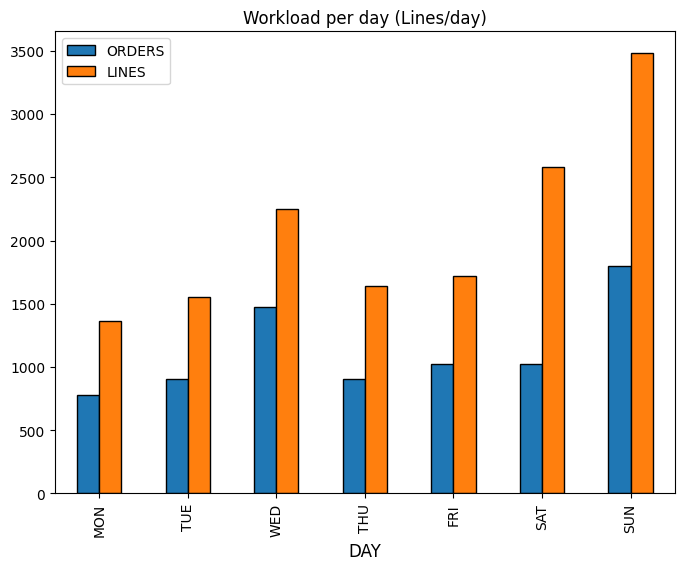

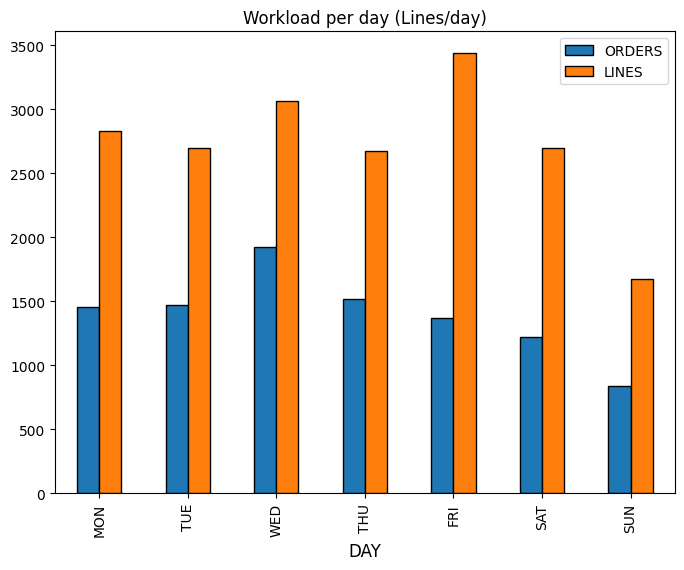

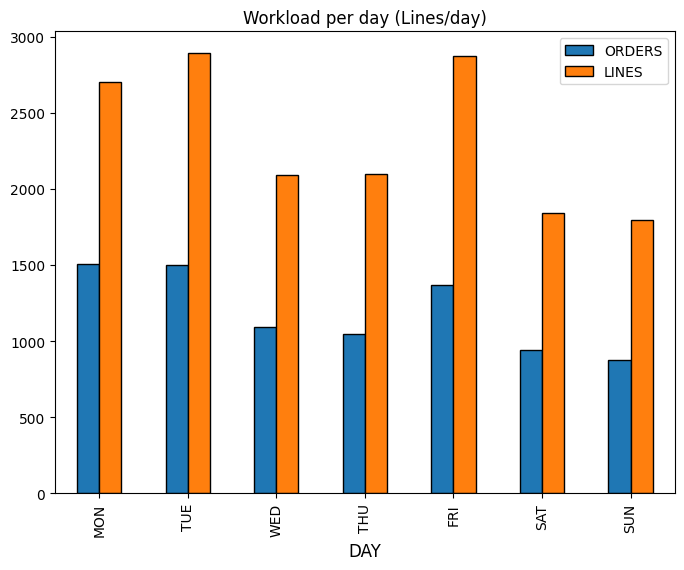

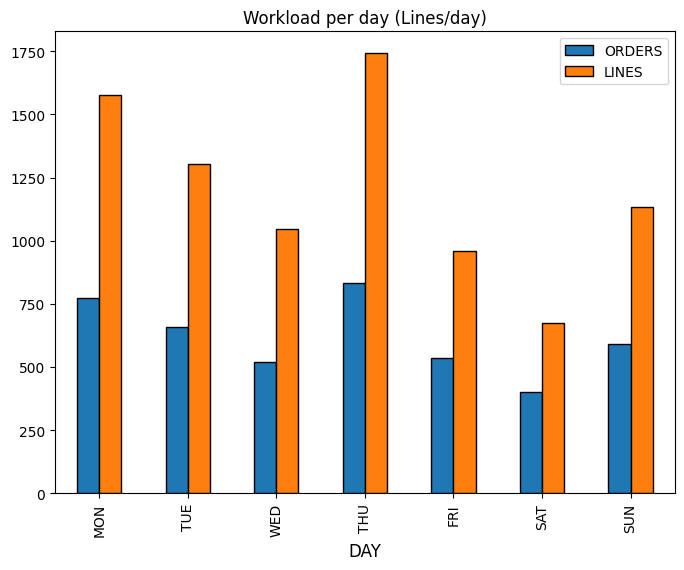

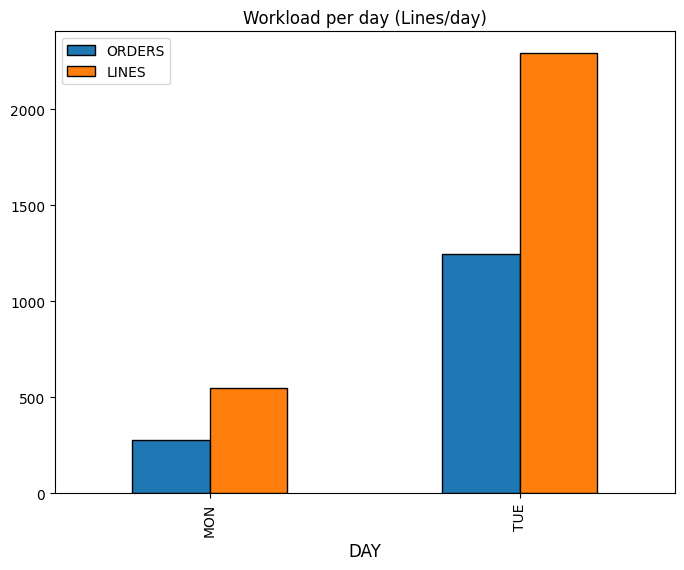

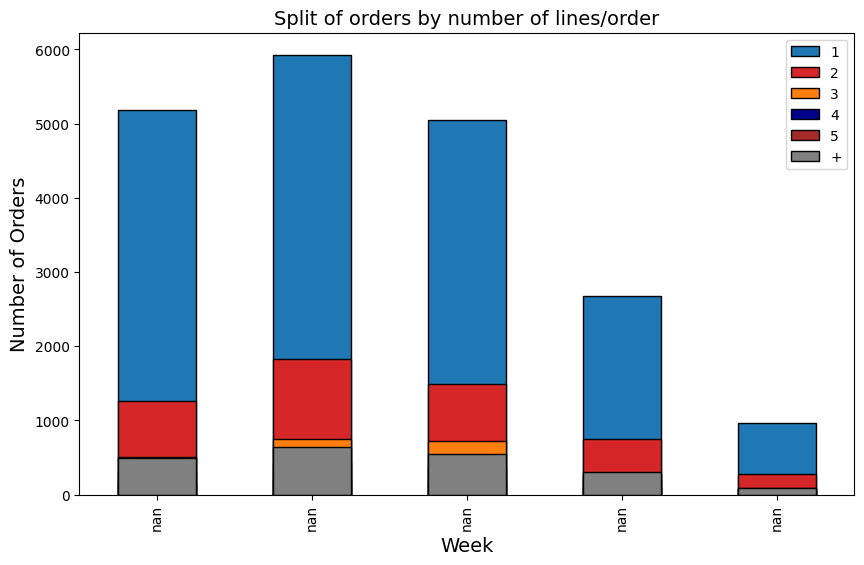

In [11]:
# Create the presentation object
prs = Presentation()

# Layout Choice for the introduction slide
image_slide_layout = prs.slide_layouts[5]
page = 1

'''Slide Introduction'''
# Create the slide
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
background = slide.background
fill = background.fill
fill.solid()
fill.fore_color.rgb = RGBColor(0, 32, 96)
# Add Title
title.text = "WAREHOUSE WORKLOAD ANALYSIS"
title.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)
# Add Subtitle
subtitle.text = 'Orders/day for the last {} weeks'.format(len(LIST_WEEKS))
subtitle.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)

'''Slides Analysis per Week'''
for WEEK in LIST_WEEKS:
    
    # Create Plot
    avg_ratio, max_ratio, busy_day, max_lines, total_lines = analysis_week(df_day, WEEK)

    # Create a slide
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    # Create Title
    title_shape = shapes.title
    title_shape.text = 'Warehouse Workload ({})'.format(WEEK)
    # Add Image    
    left = Inches(0.75)
    top = Inches(1.25)
    pic = slide.shapes.add_picture('{}.png'.format(WEEK), left, top, height=Inches(4.5))

    # Build the Text Box
    left = Inches(0.75)
    top = Inches(1.5) + Inches(4)
    width = Inches(9)
    height = Inches(2)
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    # Title
    p = tf.add_paragraph()
    p.text = 'Analysis'
    p.font.size = Pt(18)
    # First bullet point
    p = tf.add_paragraph()
    p.text = '• {} have been prepared during the week'.format(total_lines)
    p.level = 1
    # Second bullet point
    p = tf.add_paragraph()
    p.text = '• {} has been the busiest day with {} prepared'.format(busy_day, max_lines)
    p.level = 1
    # Third bullet point
    p = tf.add_paragraph()
    p.text = '• {} on average with a maximum of {}'.format(avg_ratio, max_ratio)
    p.level = 1
    
    # Add Pages
    txBox = slide.shapes.add_textbox(Inches(9), Inches(6.75), Inches(1), Inches(1))
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = str('{}/{}'.format(page, len(LIST_WEEKS) + 1 ))
    p.font.size = Pt(15)
    page += 1
    
# Convert string columns to numeric, handling any non-numeric values
df_lior = df_lior.apply(pd.to_numeric, errors='coerce')
    
# Add Analysis lines
total_orders, LIST_ANALYSIS = plot_split(df_lior)
# Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes
# Create Title
title_shape = shapes.title
title_shape.text = 'Order Profile'
# Add Image
left = Inches(0.75)
top = Inches(1.25)
pic = slide.shapes.add_picture('{}.png'.format('SPLIT'), left, top, height=Inches(4.5))
# Build the Text Box
left = Inches(0.75)
top = Inches(1.5) + Inches(4)
width = Inches(9)
height = Inches(2)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
p = tf.add_paragraph()
p.text = '{} prepared'.format(total_orders)
p.font.size = Pt(18)
for l in LIST_ANALYSIS:
    # First bullet point
    p = tf.add_paragraph()
    p.text = '• {}'.format(l)
    p.level = 1
# Add Pages
txBox = slide.shapes.add_textbox(Inches(9), Inches(6.75), Inches(1), Inches(1))
tf = txBox.text_frame
p = tf.add_paragraph()
p.text = str('{}/{}'.format(page, len(LIST_WEEKS) +1))
p.font.size = Pt(15)
page += 1

# Save
prs.save('Warehouse Workload Report.pptx')

In [12]:
# Create the presentation object
prs = Presentation()

# Layout for tables
table_slide_layout = prs.slide_layouts[5]

# Create title slide
title_slide = prs.slides.add_slide(prs.slide_layouts[0])
title = title_slide.shapes.title
subtitle = title_slide.placeholders[1]

# Set title slide content
title.text = "WAREHOUSE WORKLOAD RAW DATA"
subtitle.text = "Daily lines and volumes data tables"

# Add slide for lines per day
lines_slide = prs.slides.add_slide(table_slide_layout)
lines_title = lines_slide.shapes.title
lines_title.text = "Lines per day - Raw Data"

# Read and create table for lines
df_lines = pd.read_csv("lines per day.csv")
rows, cols = df_lines.shape
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)

# Add table shape
table = lines_slide.shapes.add_table(rows + 1, cols, left, top, width, height).table

# Fill headers
for col_idx, col_name in enumerate(df_lines.columns):
    table.cell(0, col_idx).text = str(col_name)

# Fill data
for row_idx in range(rows):
    for col_idx in range(cols):
        table.cell(row_idx + 1, col_idx).text = str(df_lines.iloc[row_idx, col_idx])

# Add slide for volumes per day
volumes_slide = prs.slides.add_slide(table_slide_layout)
volumes_title = volumes_slide.shapes.title
volumes_title.text = "Volumes per day - Raw Data"

# Read and create table for volumes
df_volumes = pd.read_csv("volumes per day.csv")
rows, cols = df_volumes.shape

# Add table shape
table = volumes_slide.shapes.add_table(rows + 1, cols, left, top, width, height).table

# Fill headers
for col_idx, col_name in enumerate(df_volumes.columns):
    table.cell(0, col_idx).text = str(col_name)

# Fill data
for row_idx in range(rows):
    for col_idx in range(cols):
        table.cell(row_idx + 1, col_idx).text = str(df_volumes.iloc[row_idx, col_idx])

# Save the presentation
prs.save('Warehouse Workload Report raw.pptx')


In [15]:
import json
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt

# First create sample.json
sample_data = [
    {
        "Department": "IT",
        "CTO Technology Lead": "John Smith",
        "Application Count": 10
    },
    {
        "Department": "IT",
        "CTO Technology Lead": "Jane Doe",
        "Application Count": 15
    },
    {
        "Department": "Finance",
        "CTO Technology Lead": "John Smith",
        "Application Count": 5
    },
    {
        "Department": "Finance",
        "CTO Technology Lead": "Jane Doe",
        "Application Count": 8
    }
]

# Write the JSON file
with open('sample.json', 'w') as f:
    json.dump(sample_data, f, indent=4)

# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])
shapes = slide.shapes
title = shapes.title
title.text = "Application Count by Department and Technology Lead"

# Create table
rows, cols = pivot_table.shape
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
table = shapes.add_table(rows + 1, cols + 1, left, top, width, height).table

# Fill header row
table.cell(0, 0).text = "Department"
for col_idx, col_name in enumerate(pivot_table.columns):
    table.cell(0, col_idx + 1).text = str(col_name)

# Fill data
for row_idx, row_name in enumerate(pivot_table.index):
    table.cell(row_idx + 1, 0).text = str(row_name)
    for col_idx, col_name in enumerate(pivot_table.columns):
        table.cell(row_idx + 1, col_idx + 1).text = str(int(pivot_table.loc[row_name, col_name]))

# Save presentation
prs.save('sample.pptx')


grey out Grand Total

In [17]:
import json
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor

# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])
shapes = slide.shapes
title = shapes.title
title.text = "Application Count by Department and Technology Lead"

# Create table
rows, cols = pivot_table.shape
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
table = shapes.add_table(rows + 1, cols + 1, left, top, width, height).table

# Fill header row
table.cell(0, 0).text = "Department"
for col_idx, col_name in enumerate(pivot_table.columns):
    table.cell(0, col_idx + 1).text = str(col_name)

# Fill data and set Grand Total formatting
grey_color = RGBColor(217, 217, 217)  # Light grey color
for row_idx, row_name in enumerate(pivot_table.index):
    table.cell(row_idx + 1, 0).text = str(row_name)
    for col_idx, col_name in enumerate(pivot_table.columns):
        cell = table.cell(row_idx + 1, col_idx + 1)
        cell.text = str(int(pivot_table.loc[row_name, col_name]))
        
        # Color last column (Grand Total)
        if col_idx == cols - 1:
            cell.fill.solid()
            cell.fill.fore_color.rgb = grey_color
            
        # Color last row (Grand Total)
        if row_idx == rows - 1:
            cell.fill.solid()
            cell.fill.fore_color.rgb = grey_color

# Save presentation
prs.save('sample.pptx')


add column title

In [18]:
import json
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor

# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])
shapes = slide.shapes
title = shapes.title
title.text = "Application Count by Department and Technology Lead"

# Create table with extra row for header label
rows, cols = pivot_table.shape
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
table = shapes.add_table(rows + 2, cols + 1, left, top, width, height).table

# Fill header label row
table.cell(0, 0).text = ""  # Empty cell above "Department"
table.cell(0, 1).text = "CTO Technology Lead"
table.cell(0, 1).merge(table.cell(0, cols))  # Merge cells for the header label

# Fill column headers row
table.cell(1, 0).text = "Department"
for col_idx, col_name in enumerate(pivot_table.columns):
    table.cell(1, col_idx + 1).text = str(col_name)

# Fill data and set Grand Total formatting
grey_color = RGBColor(217, 217, 217)
for row_idx, row_name in enumerate(pivot_table.index):
    table.cell(row_idx + 2, 0).text = str(row_name)
    for col_idx, col_name in enumerate(pivot_table.columns):
        cell = table.cell(row_idx + 2, col_idx + 1)
        cell.text = str(int(pivot_table.loc[row_name, col_name]))
        
        # Color last column (Grand Total)
        if col_idx == cols - 1:
            cell.fill.solid()
            cell.fill.fore_color.rgb = grey_color
            
        # Color last row (Grand Total)
        if row_idx == rows - 1:
            cell.fill.solid()
            cell.fill.fore_color.rgb = grey_color

# Save presentation
prs.save('sample.pptx')


modify 1x1 cell

In [19]:
import json
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor

# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])
shapes = slide.shapes
title = shapes.title
title.text = "Application Count by Department and Technology Lead"

# Create table with extra row for header label
rows, cols = pivot_table.shape
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
table = shapes.add_table(rows + 2, cols + 1, left, top, width, height).table

# Fill and merge Department cell
table.cell(0, 0).text = "Department"
table.cell(0, 0).merge(table.cell(1, 0))  # Merge vertically

# Fill header label row
table.cell(0, 1).text = "CTO Technology Lead"
table.cell(0, 1).merge(table.cell(0, cols))  # Merge cells for the header label

# Fill column headers row
for col_idx, col_name in enumerate(pivot_table.columns):
    table.cell(1, col_idx + 1).text = str(col_name)

# Fill data and set Grand Total formatting
grey_color = RGBColor(217, 217, 217)
for row_idx, row_name in enumerate(pivot_table.index):
    table.cell(row_idx + 2, 0).text = str(row_name)
    for col_idx, col_name in enumerate(pivot_table.columns):
        cell = table.cell(row_idx + 2, col_idx + 1)
        cell.text = str(int(pivot_table.loc[row_name, col_name]))
        
        # Color last column (Grand Total)
        if col_idx == cols - 1:
            cell.fill.solid()
            cell.fill.fore_color.rgb = grey_color
            
        # Color last row (Grand Total)
        if row_idx == rows - 1:
            cell.fill.solid()
            cell.fill.fore_color.rgb = grey_color

# Save presentation
prs.save('sample.pptx')


further refinement of title row/column

In [23]:
import json
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.text import PP_ALIGN

# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])
shapes = slide.shapes
title = shapes.title
title.text = "Application Count by Department and Technology Lead"

# Create table with extra row for header label
rows, cols = pivot_table.shape
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
table = shapes.add_table(rows + 2, cols + 1, left, top, width, height).table

# Define colors
header_color = RGBColor(155, 194, 230)
total_color = RGBColor(217, 217, 217)

# Fill and merge Department cell
dept_cell = table.cell(0, 0)
dept_cell.text = "Department"
dept_cell.merge(table.cell(1, 0))
dept_cell.fill.solid()
dept_cell.fill.fore_color.rgb = header_color

# Fill header label row
header_cell = table.cell(0, 1)
header_cell.text = "CTO Technology Lead"
header_cell.merge(table.cell(0, cols))
header_cell.fill.solid()
header_cell.fill.fore_color.rgb = header_color
header_cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# Fill column headers row with color
for col_idx, col_name in enumerate(pivot_table.columns):
    cell = table.cell(1, col_idx + 1)
    cell.text = str(col_name)
    cell.fill.solid()
    cell.fill.fore_color.rgb = header_color
    if col_name == "Grand Total":
        cell.fill.fore_color.rgb = total_color

# Fill data and set Grand Total formatting
for row_idx, row_name in enumerate(pivot_table.index):
    cell = table.cell(row_idx + 2, 0)
    cell.text = str(row_name)
    if row_name == "Grand Total":
        cell.fill.solid()
        cell.fill.fore_color.rgb = total_color
        
    for col_idx, col_name in enumerate(pivot_table.columns):
        cell = table.cell(row_idx + 2, col_idx + 1)
        cell.text = str(int(pivot_table.loc[row_name, col_name]))
        
        # Color last column and row (Grand Total)
        if col_idx == cols - 1 or row_name == "Grand Total":
            cell.fill.solid()
            cell.fill.fore_color.rgb = total_color

# Add this after table creation and before saving:
for row_idx in range(2, rows + 2):
    if row_idx < rows + 1:  # Not the Grand Total row
        current_height = table.rows[row_idx].height
        table.rows[row_idx].height = int(current_height / 2)

# Add font size setting for all cells
for row in table.rows:
    for cell in row.cells:
        paragraph = cell.text_frame.paragraphs[0]
        paragraph.font.size = Pt(12)

# Save presentation
prs.save('sample.pptx')


ADD page content

In [48]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
from datetime import datetime

# Create a presentation object
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
slide = prs.slides.add_slide(slide_layout)
shapes = slide.shapes

# Title
title_box = shapes.add_textbox(Inches(0.5), Inches(0.5), Inches(9), Inches(1))
title_frame = title_box.text_frame
title = title_frame.add_paragraph()
title.text = "Application Product Owner Not Active"
title.font.bold = True
title.font.size = Pt(20)
# title.font.color.rgb = RGBColor(0, 0, 0)
title.alignment = PP_ALIGN.CENTER
title_box.fill.solid()
title_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Deep dark blue
title.font.color.rgb = RGBColor(255, 255, 255)  # White text for contrast

# Add run date textbox to the right
current_date = datetime.now().strftime("%d-%m-%Y")
run_date_box = slide.shapes.add_textbox(Inches(7.5), Inches(0.6), Inches(2), Inches(1))
run_date_frame = run_date_box.text_frame
run_date = run_date_frame.add_paragraph()
run_date.text = f"Run Date: {current_date}"
run_date.font.size = Pt(12)
run_date.font.color.rgb = RGBColor(255, 255, 255)
run_date_box.fill.solid()
run_date_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Match title background

# Objective text
objective_box = shapes.add_textbox(Inches(0.5), Inches(1.5), Inches(9), Inches(2))
objective_frame = objective_box.text_frame
# objective_frame.word_wrap = True
# objective_frame.auto_size = None  # Ensures text stays within frame bounds
# objective = objective_frame.add_paragraph()
# objective.text = ("Objective:\n"
#                   "All IT Applications to have an active owner from the Owning Transaction Cycle i.e. owner is an existing employee and not on long term leave. The following statistics indicate the number of applications where the product owner is inactive. These need to be updated and assigned to active users.\n"
#                   "How to Fix:\n"
#                   "MyIT - Request Update to a Business Application (Nominated representatives can be given access to make direct updates through the ServiceNow User Interface, requests to be raised with Mryutunajy Pangirahi or Andy Harrison)\n"
#                   "Detailed Report:\n"
#                   "Click the link to view both the summary and detailed data.")
# objective.font.size = Pt(8)
# objective.font.color.rgb = RGBColor(255, 255, 255)  # White text for contrast
# Create separate paragraphs for each section
objective_frame.word_wrap = True
objective_frame.auto_size = None

# Objective section
p1 = objective_frame.add_paragraph()
p1.text = "Objective:"
p1.font.bold = True
p1.font.color.rgb = RGBColor(255, 255, 255)
p1.font.size = Pt(8)

p2 = objective_frame.add_paragraph()
p2.text = "All IT Applications to have an active owner from the Owning Transaction Cycle i.e. owner is an existing employee and not on long term leave. The following statistics indicate the number of applications where the product owner is inactive. These need to be updated and assigned to active users."
p2.font.color.rgb = RGBColor(255, 255, 255)
p2.font.size = Pt(7)

# How to Fix section
p3 = objective_frame.add_paragraph()
p3.text = "How to Fix:"
p3.font.bold = True
p3.font.color.rgb = RGBColor(255, 255, 255)
p3.font.size = Pt(8)

# Define the URL
update_app_url = "https://your-servicenow-url.com/update-application"

# In the How to Fix section
p4 = objective_frame.add_paragraph()
p4.text = "MyIT/ - "
p4.font.color.rgb = RGBColor(255, 255, 255)

# Add hyperlink
run = p4.add_run()
run.text = "Request Update to a Business Application"
run.hyperlink.address = update_app_url
run.font.color.rgb = RGBColor(135, 206, 250)  # Light blue color for hyperlink
run.font.underline = True

# Continue with remaining text
run = p4.add_run()
run.text = " (Nominated representatives can be given access to make direct updates through the ServiceNow User Interface, requests to be raised with Mryutunajy Pangirahi or Andy Harrison)"
run.font.color.rgb = RGBColor(255, 255, 255)
p4.font.size = Pt(7)

# Detailed Report section
p5 = objective_frame.add_paragraph()
p5.text = "Detailed Report:"
p5.font.bold = True
p5.font.color.rgb = RGBColor(255, 255, 255)
p5.font.size = Pt(8)

p6 = objective_frame.add_paragraph()
p6.text = "Click the link to view both the summary and detailed data."
p6.font.color.rgb = RGBColor(255, 255, 255)
p6.font.size = Pt(7)
# objective.font.color.rgb = RGBColor(0, 0, 0)
objective_box.fill.solid()
objective_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Deep dark blue


# Table
# table_data = [
#     ['Department', 'CTO Technology Lead', '', ''],
#     ['Jane Doe', 'John Smith', 'Grand Total', ''],
#     ['Finance', 8, 5, 13],
#     ['IT', 15, 10, 25],
#     ['Grand Total', 23, 15, 38]
# ]

# rows, cols = len(table_data), len(table_data[0])
# table = slide.shapes.add_table(rows, cols, Inches(1), Inches(3.5), Inches(8), Inches(2)).table

# # Set column widths
# for i in range(cols):
#     table.columns[i].width = Inches(2)

# # Fill the table with data
# for row_idx, row in enumerate(table_data):
#     for col_idx, cell_value in enumerate(row):
#         cell = table.cell(row_idx, col_idx)
#         cell.text = str(cell_value)
#         cell.text_frame.paragraphs[0].font.size = Pt(12)
#         cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
#         # Set background color for header row
#         if row_idx == 0:
#             cell.fill.solid()
#             cell.fill.fore_color.rgb = RGBColor(200, 200, 200)

# # Save the presentation
# prs.save('application_product_owner_not_active.pptx')

# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
# prs = Presentation()
# slide = prs.slides.add_slide(prs.slide_layouts[5])
# shapes = slide.shapes
# title = shapes.title
# title.text = "Application Count by Department and Technology Lead"

# Create table with extra row for header label
rows, cols = pivot_table.shape
left = Inches(0.5)
top = Inches(3)
width = Inches(9)
height = Inches(5)
table = shapes.add_table(rows + 2, cols + 1, left, top, width, height).table

# Define colors
header_color = RGBColor(155, 194, 230)
total_color = RGBColor(217, 217, 217)

# Fill and merge Department cell
dept_cell = table.cell(0, 0)
dept_cell.text = "Department"
dept_cell.merge(table.cell(1, 0))
dept_cell.fill.solid()
dept_cell.fill.fore_color.rgb = header_color

# Fill header label row
header_cell = table.cell(0, 1)
header_cell.text = "CTO Technology Lead"
header_cell.merge(table.cell(0, cols))
header_cell.fill.solid()
header_cell.fill.fore_color.rgb = header_color
header_cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# Fill column headers row with color
for col_idx, col_name in enumerate(pivot_table.columns):
    cell = table.cell(1, col_idx + 1)
    cell.text = str(col_name)
    cell.fill.solid()
    cell.fill.fore_color.rgb = header_color
    if col_name == "Grand Total":
        cell.fill.fore_color.rgb = total_color

# Fill data and set Grand Total formatting
for row_idx, row_name in enumerate(pivot_table.index):
    cell = table.cell(row_idx + 2, 0)
    cell.text = str(row_name)
    if row_name == "Grand Total":
        cell.fill.solid()
        cell.fill.fore_color.rgb = total_color
        
    for col_idx, col_name in enumerate(pivot_table.columns):
        cell = table.cell(row_idx + 2, col_idx + 1)
        cell.text = str(int(pivot_table.loc[row_name, col_name]))
        
        # Color last column and row (Grand Total)
        if col_idx == cols - 1 or row_name == "Grand Total":
            cell.fill.solid()
            cell.fill.fore_color.rgb = total_color

# Add this after table creation and before saving:
for row_idx in range(2, rows + 2):
    if row_idx < rows + 1:  # Not the Grand Total row
        current_height = table.rows[row_idx].height
        table.rows[row_idx].height = int(current_height / 2)

# Add font size setting for all cells
for row in table.rows:
    for cell in row.cells:
        paragraph = cell.text_frame.paragraphs[0]
        paragraph.font.size = Pt(12)

# Save presentation
prs.save('sample.pptx')

Populate a configurable json

In [46]:
# First create content.json
content_config = {
    "sections": [
        {
            "header": "Objective:",
            "header_font_size": 8,
            "content": "All IT Applications to have an active owner from the Owning Transaction Cycle i.e. owner is an existing employee and not on long term leave. The following statistics indicate the number of applications where the product owner is inactive. These need to be updated and assigned to active users.",
            "content_font_size": 7
        },
        {
            "header": "How to Fix:",
            "header_font_size": 8,
            "content": "MyIT/ - ",
            "hyperlink": {
                "text": "Request Update to a Business Application",
                "url": "https://your-servicenow-url.com/update-application"
            },
            "content_suffix": " (Nominated representatives can be given access to make direct updates through the ServiceNow User Interface, requests to be raised with Mryutunajy Pangirahi or Andy Harrison)",
            "content_font_size": 7
        },
        {
            "header": "Detailed Report:",
            "header_font_size": 8,
            "content": "Click the link to view both the summary and detailed data.",
            "content_font_size": 7
        }
    ]
}

# Save the configuration
with open('content.json', 'w') as f:
    json.dump(content_config, f, indent=4)


In [42]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
from datetime import datetime

# Create a presentation object
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
slide = prs.slides.add_slide(slide_layout)
shapes = slide.shapes

# Title
title_box = shapes.add_textbox(Inches(0.5), Inches(0.5), Inches(9), Inches(1))
title_frame = title_box.text_frame
title = title_frame.add_paragraph()
title.text = "Application Product Owner Not Active"
title.font.bold = True
title.font.size = Pt(20)
# title.font.color.rgb = RGBColor(0, 0, 0)
title.alignment = PP_ALIGN.CENTER
title_box.fill.solid()
title_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Deep dark blue
title.font.color.rgb = RGBColor(255, 255, 255)  # White text for contrast

# Add run date textbox to the right
current_date = datetime.now().strftime("%d-%m-%Y")
run_date_box = slide.shapes.add_textbox(Inches(7.5), Inches(0.6), Inches(2), Inches(1))
run_date_frame = run_date_box.text_frame
run_date = run_date_frame.add_paragraph()
run_date.text = f"Run Date: {current_date}"
run_date.font.size = Pt(12)
run_date.font.color.rgb = RGBColor(255, 255, 255)
run_date_box.fill.solid()
run_date_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Match title background

from pptx.enum.text import MSO_ANCHOR
# Objective text
objective_box = shapes.add_textbox(Inches(0.5), Inches(1.5), Inches(9), Inches(2))
objective_box.vertical_anchor = MSO_ANCHOR.TOP
objective_box.fill.solid()
objective_box.fill.fore_color.rgb = RGBColor(20, 32, 96)  # Same dark blue as title
objective_frame = objective_box.text_frame

# # First create content.json
# content_config = {
#     "sections": [
#         {
#             "header": "Objective:",
#             "header_font_size": 8,
#             "content": "All IT Applications to have an active owner from the Owning Transaction Cycle i.e. owner is an existing employee and not on long term leave. The following statistics indicate the number of applications where the product owner is inactive. These need to be updated and assigned to active users.",
#             "content_font_size": 7
#         },
#         {
#             "header": "How to Fix:",
#             "header_font_size": 8,
#             "content": "MyIT/ - ",
#             "hyperlink": {
#                 "text": "Request Update to a Business Application",
#                 "url": "https://your-servicenow-url.com/update-application"
#             },
#             "content_suffix": " (Nominated representatives can be given access to make direct updates through the ServiceNow User Interface, requests to be raised with Mryutunajy Pangirahi or Andy Harrison)",
#             "content_font_size": 7
#         },
#         {
#             "header": "Detailed Report:",
#             "header_font_size": 8,
#             "content": "Click the link to view both the summary and detailed data.",
#             "content_font_size": 7
#         }
#     ]
# }

# # Save the configuration
# with open('content.json', 'w') as f:
#     json.dump(content_config, f, indent=4)

# Then read and apply the configuration
with open('content.json', 'r') as f:
    content = json.load(f)

objective_frame.word_wrap = True
objective_frame.auto_size = None
# Remove any existing empty paragraphs to prevent initial spacing
if objective_frame.paragraphs:
    objective_frame.paragraphs[0].font.size=Pt(1)
    objective_frame.clear()  # This clears the default empty paragraph

for section in content['sections']:
    # Add header
    p_header = objective_frame.add_paragraph()
    p_header.text = section['header']
    p_header.font.bold = True
    p_header.font.color.rgb = RGBColor(255, 255, 255)
    p_header.font.size = Pt(section['header_font_size'])
    
    # Add content
    p_content = objective_frame.add_paragraph()
    
    if 'hyperlink' in section:
        # First part of content
        p_content.text = section['content']
        p_content.font.color.rgb = RGBColor(255, 255, 255)
        
        # Hyperlink
        run = p_content.add_run()
        run.text = section['hyperlink']['text']
        run.hyperlink.address = section['hyperlink']['url']
        run.font.color.rgb = RGBColor(135, 206, 250)
        run.font.underline = True
        
        # Suffix content
        run = p_content.add_run()
        run.text = section['content_suffix']
        run.font.color.rgb = RGBColor(255, 255, 255)
    else:
        p_content.text = section['content']
        p_content.font.color.rgb = RGBColor(255, 255, 255)
    
    p_content.font.size = Pt(section['content_font_size'])


# Read JSON data
with open('sample.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and pivot
df = pd.DataFrame(data)
pivot_table = pd.pivot_table(
    df, 
    values='Application Count',
    index='Department',
    columns='CTO Technology Lead',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create presentation
# prs = Presentation()
# slide = prs.slides.add_slide(prs.slide_layouts[5])
# shapes = slide.shapes
# title = shapes.title
# title.text = "Application Count by Department and Technology Lead"

# Create table with extra row for header label
rows, cols = pivot_table.shape
left = Inches(0.5)
top = Inches(3)
width = Inches(9)
height = Inches(5)
table = shapes.add_table(rows + 2, cols + 1, left, top, width, height).table

# Define colors
header_color = RGBColor(155, 194, 230)
total_color = RGBColor(217, 217, 217)

# Fill and merge Department cell
dept_cell = table.cell(0, 0)
dept_cell.text = "Department"
dept_cell.merge(table.cell(1, 0))
dept_cell.fill.solid()
dept_cell.fill.fore_color.rgb = header_color

# Fill header label row
header_cell = table.cell(0, 1)
header_cell.text = "CTO Technology Lead"
header_cell.merge(table.cell(0, cols))
header_cell.fill.solid()
header_cell.fill.fore_color.rgb = header_color
header_cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

# Fill column headers row with color
for col_idx, col_name in enumerate(pivot_table.columns):
    cell = table.cell(1, col_idx + 1)
    cell.text = str(col_name)
    cell.fill.solid()
    cell.fill.fore_color.rgb = header_color
    if col_name == "Grand Total":
        cell.fill.fore_color.rgb = total_color

# Fill data and set Grand Total formatting
for row_idx, row_name in enumerate(pivot_table.index):
    cell = table.cell(row_idx + 2, 0)
    cell.text = str(row_name)
    if row_name == "Grand Total":
        cell.fill.solid()
        cell.fill.fore_color.rgb = total_color
        
    for col_idx, col_name in enumerate(pivot_table.columns):
        cell = table.cell(row_idx + 2, col_idx + 1)
        cell.text = str(int(pivot_table.loc[row_name, col_name]))
        
        # Color last column and row (Grand Total)
        if col_idx == cols - 1 or row_name == "Grand Total":
            cell.fill.solid()
            cell.fill.fore_color.rgb = total_color

# Add this after table creation and before saving:
for row_idx in range(2, rows + 2):
    if row_idx < rows + 1:  # Not the Grand Total row
        current_height = table.rows[row_idx].height
        table.rows[row_idx].height = int(current_height / 2)

# Add font size setting for all cells
for row in table.rows:
    for cell in row.cells:
        paragraph = cell.text_frame.paragraphs[0]
        paragraph.font.size = Pt(12)

# Save presentation
prs.save('sample.pptx')


In [40]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN, MSO_ANCHOR
from pptx.dml.color import RGBColor
from datetime import datetime
import json

# Create a presentation object
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
slide = prs.slides.add_slide(slide_layout)
shapes = slide.shapes

# Title
title_box = shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
title_frame = title_box.text_frame
title = title_frame.add_paragraph()
title.text = "Application Product Owner Not Active"
title.font.bold = True
title.font.size = Pt(20)
title.alignment = PP_ALIGN.CENTER
title.font.color.rgb = RGBColor(255, 255, 255)
title_box.fill.solid()
title_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Deep dark blue

# Add run date textbox to the right
current_date = datetime.now().strftime("%d-%m-%Y")
run_date_box = slide.shapes.add_textbox(Inches(7.5), Inches(0.3), Inches(2), Inches(0.5))
run_date_frame = run_date_box.text_frame
run_date = run_date_frame.add_paragraph()
run_date.text = f"Run Date: {current_date}"
run_date.font.size = Pt(12)
run_date.font.color.rgb = RGBColor(255, 255, 255)
run_date_box.fill.solid()
run_date_box.fill.fore_color.rgb = RGBColor(0, 32, 96)  # Match title background

# Objective text box
objective_box = shapes.add_textbox(Inches(0.5), Inches(1.1), Inches(9), Inches(1.5))
objective_box.vertical_anchor = MSO_ANCHOR.TOP
objective_box.fill.solid()
objective_box.fill.fore_color.rgb = RGBColor(20, 32, 96)  # Same dark blue as title
objective_frame = objective_box.text_frame
objective_frame.word_wrap = True

# Remove any existing empty paragraphs to prevent initial spacing
if objective_frame.paragraphs:
    objective_frame.paragraphs[0].font.size=Pt(1)
    objective_frame.clear()  # This clears the default empty paragraph

# Load and display content from JSON configuration
with open('content.json', 'r') as f:
    content = json.load(f)

# Fill the "Objective" content
for section in content['sections']:
    # Add header
    p_header = objective_frame.add_paragraph()
    p_header.text = section['header']
    p_header.font.bold = True
    p_header.font.color.rgb = RGBColor(255, 255, 255)
    p_header.font.size = Pt(section['header_font_size'])

    # Add content
    p_content = objective_frame.add_paragraph()
    if 'hyperlink' in section:
        # First part of content
        p_content.text = section['content']
        p_content.font.color.rgb = RGBColor(255, 255, 255)

        # Hyperlink
        run = p_content.add_run()
        run.text = section['hyperlink']['text']
        run.hyperlink.address = section['hyperlink']['url']
        run.font.color.rgb = RGBColor(135, 206, 250)
        run.font.underline = True

        # Suffix content
        run = p_content.add_run()
        run.text = section['content_suffix']
        run.font.color.rgb = RGBColor(255, 255, 255)
    else:
        p_content.text = section['content']
        p_content.font.color.rgb = RGBColor(255, 255, 255)

    p_content.font.size = Pt(section['content_font_size'])

# Adjust the content text box to avoid extra whitespace
objective_box.height = Inches(1)  # Adjust this value to control whitespace

# Save presentation
prs.save('updated_presentation.pptx')




burndown

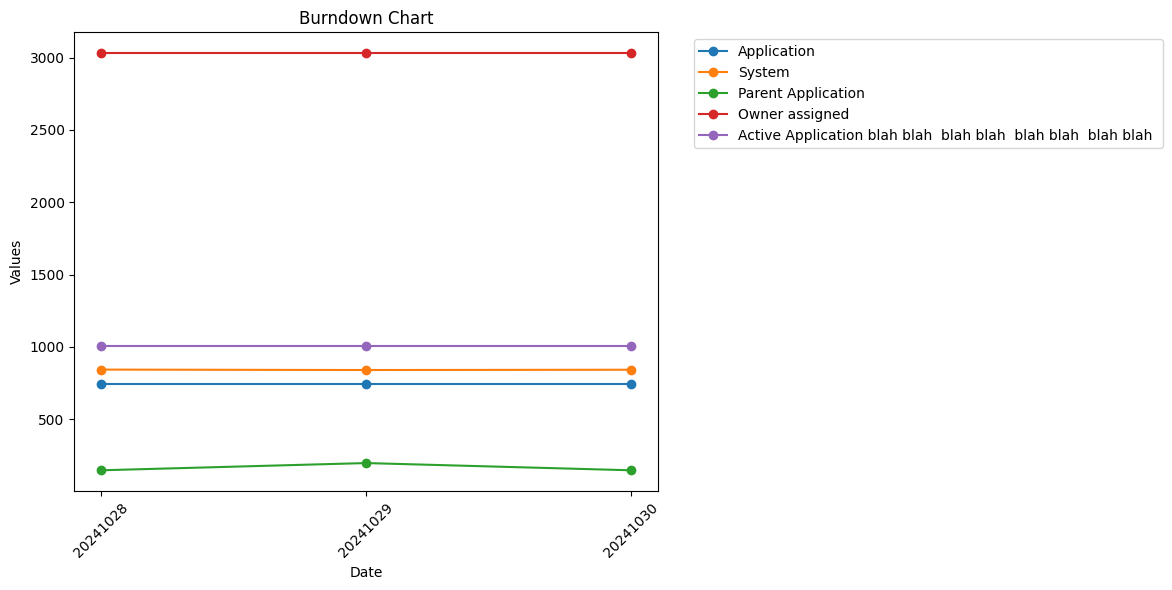

In [2]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Get all JSON files from stats folder
json_files = glob.glob('./stats/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Prepare data for plotting
categories = list(data_by_date[sorted_dates[0]].keys())
values_by_category = {cat: [] for cat in categories}

for date in sorted_dates:
    for category in categories:
        values_by_category[category].append(data_by_date[date][category])

# Create plot
plt.figure(figsize=(12, 6))
for category in categories:
    plt.plot(sorted_dates, values_by_category[category], marker='o', label=category)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Burndown Chart')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot
today = datetime.now().strftime('%Y%m%d')
plot_filename = f'burndown_{today}.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


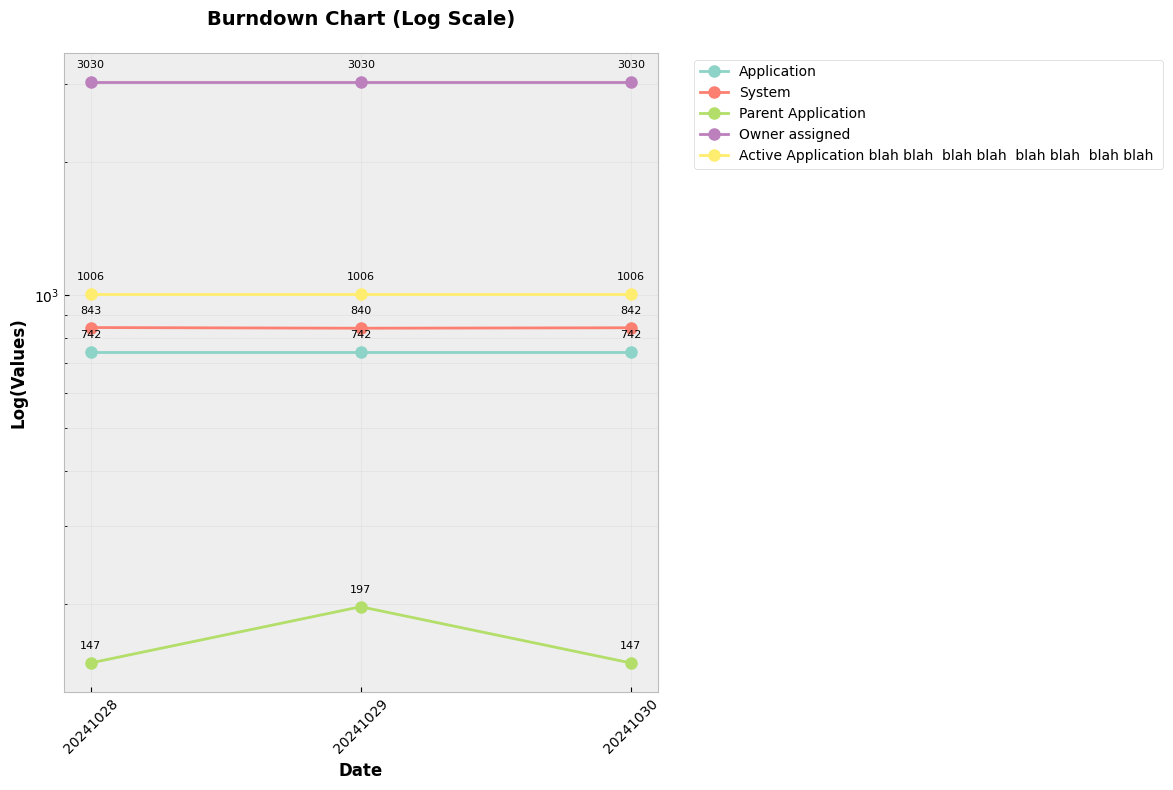

In [5]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

# Get all JSON files from stats folder
json_files = glob.glob('./stats/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Prepare data for plotting
categories = list(data_by_date[sorted_dates[0]].keys())
values_by_category = {cat: [] for cat in categories}

for date in sorted_dates:
    for category in categories:
        values_by_category[category].append(data_by_date[date][category])

# Create plot with enhanced visibility
plt.style.use('bmh')  # Using 'bmh' style instead of 'seaborn'
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
for category, color in zip(categories, colors):
    ax.plot(sorted_dates, values_by_category[category], marker='o', 
            label=category, linewidth=2, markersize=8, color=color)

# Set log scale for y-axis
ax.set_yscale('log')

# Enhance the grid
ax.grid(True, which="both", ls="-", alpha=0.2)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Labels and title
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Log(Values)', fontsize=12, fontweight='bold')
plt.title('Burndown Chart (Log Scale)', fontsize=14, fontweight='bold', pad=20)

# Enhance legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=10, frameon=True, facecolor='white')

# Add value labels on points
for category in categories:
    for x, y in zip(sorted_dates, values_by_category[category]):
        ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", 
                   xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()

# Save plot
today = datetime.now().strftime('%Y%m%d')
plot_filename = f'burndown_{today}.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


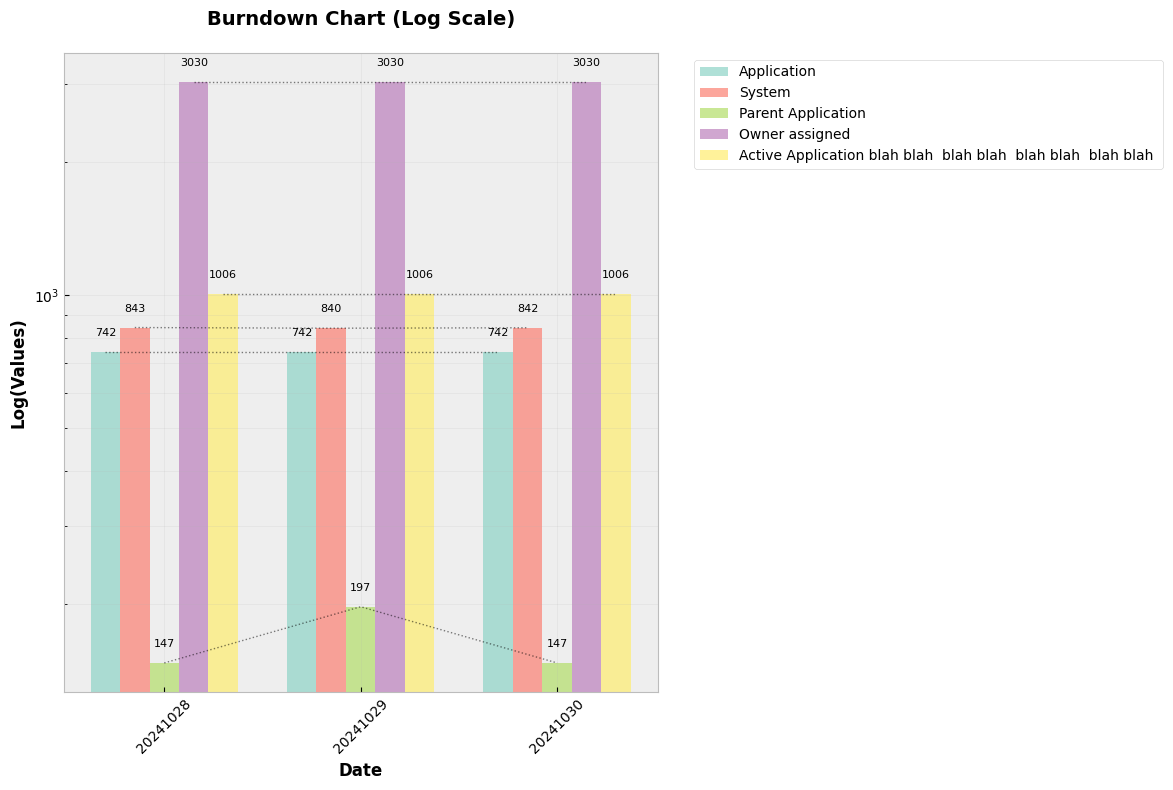

In [11]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

# Get all JSON files from stats folder
json_files = glob.glob('./stats/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Prepare data for plotting
categories = list(data_by_date[sorted_dates[0]].keys())
values_by_category = {cat: [] for cat in categories}

for date in sorted_dates:
    for category in categories:
        values_by_category[category].append(data_by_date[date][category])

# Create plot with enhanced visibility
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(len(sorted_dates))

# Plot bars and lines for each category
for i, (category, color) in enumerate(zip(categories, plt.cm.Set3(np.linspace(0, 1, len(categories))))):
    # Plot bars
    bars = ax.bar(index + i * bar_width, values_by_category[category], 
                  bar_width, label=category, color=color, alpha=0.7)
    
    # Plot connecting dotted lines
    ax.plot(index + i * bar_width, values_by_category[category], 
            color='black', linestyle=':', linewidth=1, alpha=0.5)

# Set log scale for y-axis
ax.set_yscale('log')

# Enhance the grid
ax.grid(True, which="both", ls="-", alpha=0.2)

# Set x-axis ticks
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(sorted_dates, rotation=45)

# Labels and title
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Log(Values)', fontsize=12, fontweight='bold')
plt.title('Burndown Chart (Log Scale)', fontsize=14, fontweight='bold', pad=20)

# Enhance legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=10, frameon=True, facecolor='white')

# Add value labels on bars
for i, category in enumerate(categories):
    for j, value in enumerate(values_by_category[category]):
        ax.annotate(f'{int(value)}', 
                   xy=(j + i * bar_width, value),
                   xytext=(0, 10),
                   textcoords='offset points',
                   ha='center',
                   va='bottom',
                   fontsize=8)

plt.tight_layout()

# Save plot
today = datetime.now().strftime('%Y%m%d')
plot_filename = f'burndown_{today}.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')


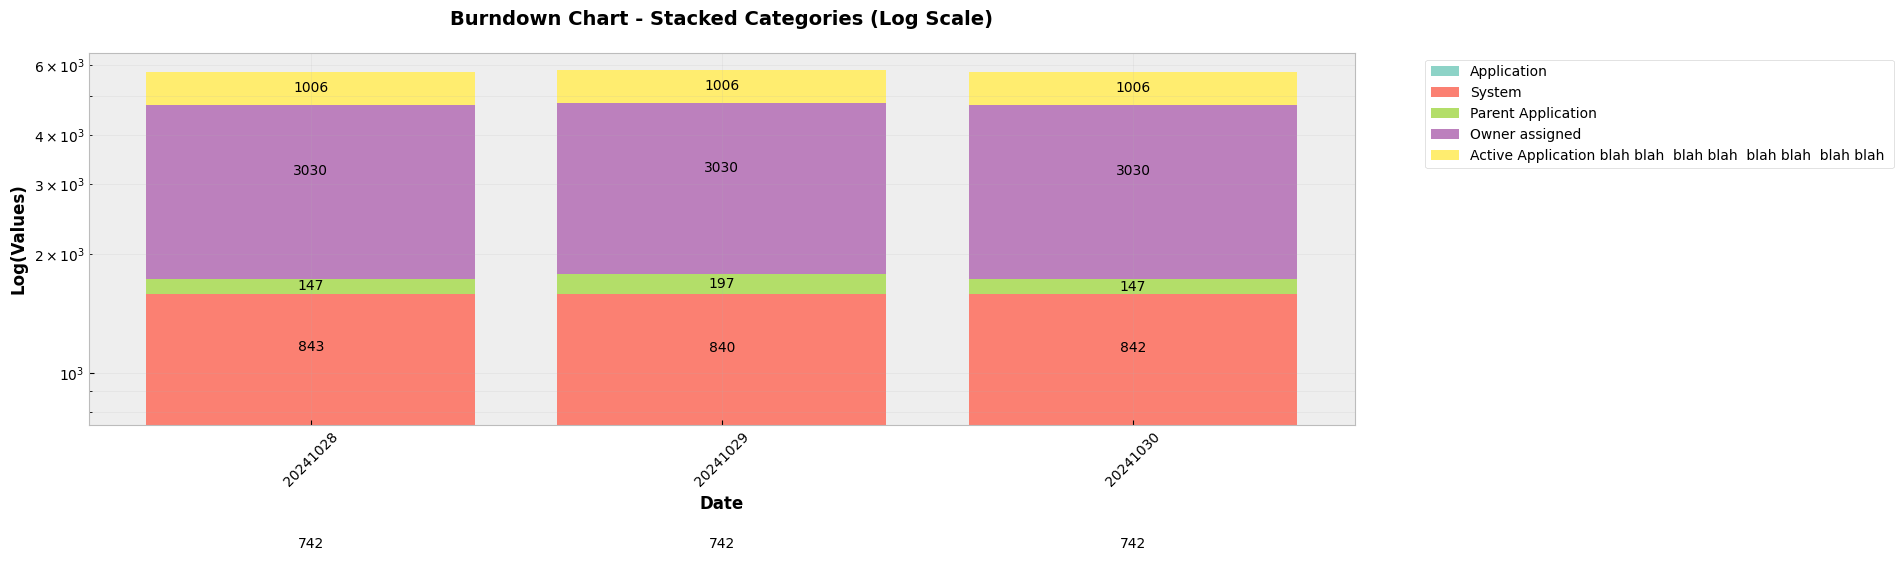

In [21]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

# Get all JSON files from stats folder
json_files = glob.glob('./stats/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Prepare data for plotting
categories = list(data_by_date[sorted_dates[0]].keys())
values_by_category = {cat: [] for cat in categories}

for date in sorted_dates:
    for category in categories:
        values_by_category[category].append(data_by_date[date][category])

# Create plot with enhanced visibility
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 6))

# Create stacked bars
bottom = np.zeros(len(sorted_dates))
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

for category, color in zip(categories, colors):
    values = values_by_category[category]
    bars = ax.bar(sorted_dates, values, bottom=bottom, label=category, color=color)
    # Add value labels in the middle of each bar segment
    for idx, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 
                bottom[idx] + height/2.,
                f'{int(values[idx])}',
                ha='center', 
                va='center')
    bottom += values

# Set log scale for y-axis
ax.set_yscale('log')

# Enhance the grid
ax.grid(True, which="both", ls="-", alpha=0.2)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Labels and title
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Log(Values)', fontsize=12, fontweight='bold')
plt.title('Burndown Chart - Stacked Categories (Log Scale)', fontsize=14, fontweight='bold', pad=20)

# Enhance legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=10, frameon=True, facecolor='white')

plt.tight_layout()
plt.subplots_adjust(right=0.85)

# Save plot
today = datetime.now().strftime('%Y%m%d')
plot_filename = f'burndown_{today}.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')




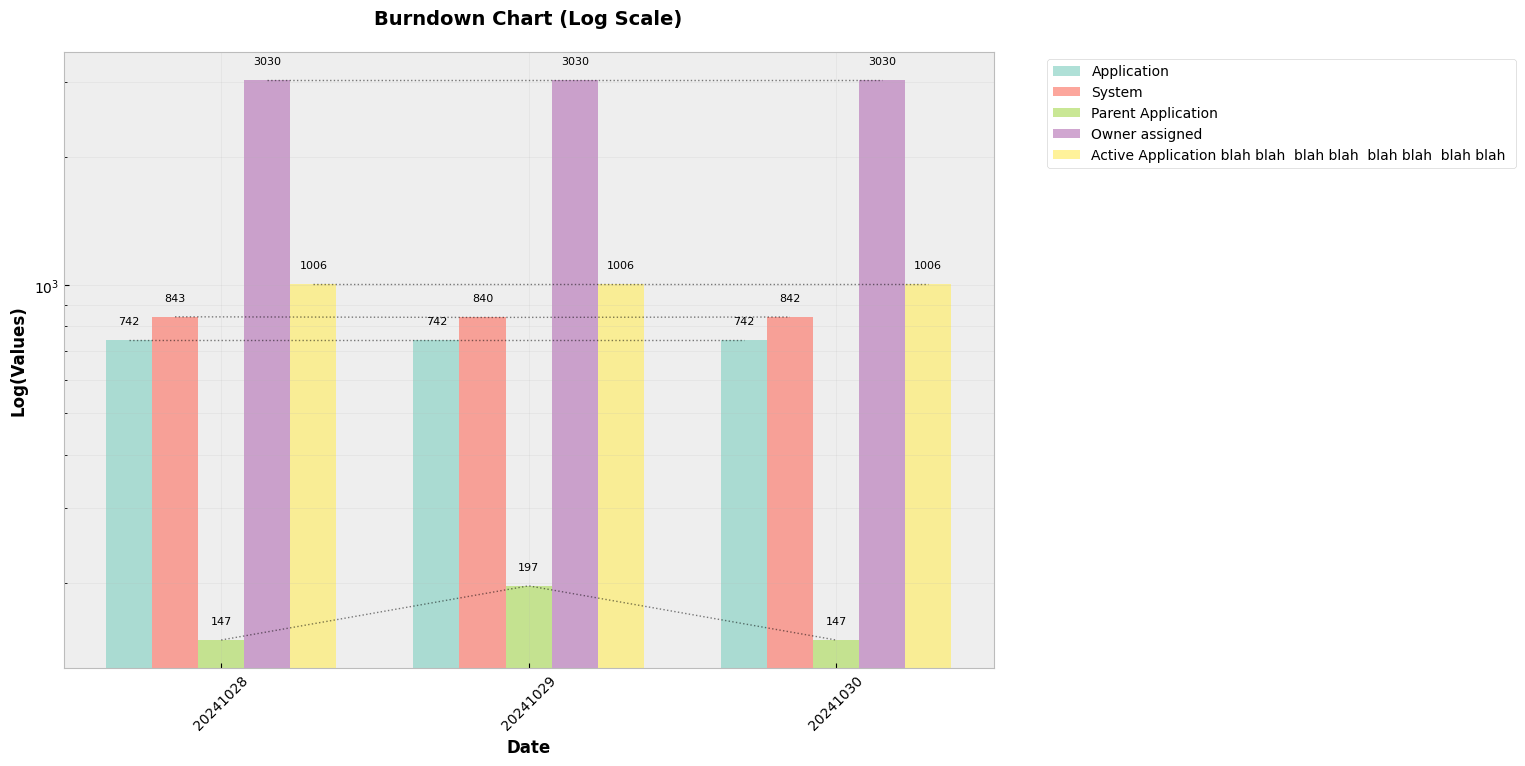

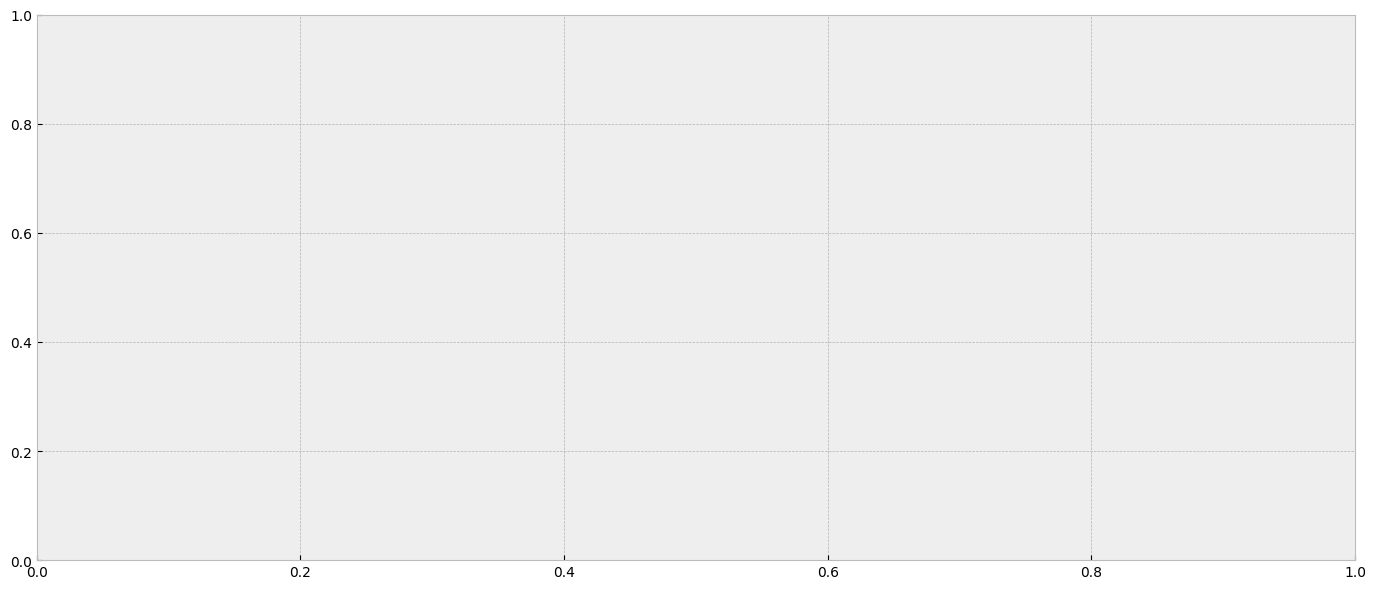

In [9]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

# Get all JSON files from stats folder
json_files = glob.glob('./stats/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Prepare data for plotting
categories = list(data_by_date[sorted_dates[0]].keys())
values_by_category = {cat: [] for cat in categories}

for date in sorted_dates:
    for category in categories:
        values_by_category[category].append(data_by_date[date][category])

# Create plot with enhanced visibility
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(len(sorted_dates))

# Plot bars and lines for each category
for i, (category, color) in enumerate(zip(categories, plt.cm.Set3(np.linspace(0, 1, len(categories))))):
    # Plot bars
    bars = ax.bar(index + i * bar_width, values_by_category[category], 
                  bar_width, label=category, color=color, alpha=0.7)
    
    # Plot connecting dotted lines
    ax.plot(index + i * bar_width, values_by_category[category], 
            color='black', linestyle=':', linewidth=1, alpha=0.5)

# Set log scale for y-axis
ax.set_yscale('log')

# Enhance the grid
ax.grid(True, which="both", ls="-", alpha=0.2)

# Set x-axis ticks
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(sorted_dates, rotation=45)

# Labels and title
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Log(Values)', fontsize=12, fontweight='bold')
plt.title('Burndown Chart (Log Scale)', fontsize=14, fontweight='bold', pad=20)

# Enhance legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=10, frameon=True, facecolor='white')

# Add value labels on bars
for i, category in enumerate(categories):
    for j, value in enumerate(values_by_category[category]):
        ax.annotate(f'{int(value)}', 
                   xy=(j + i * bar_width, value),
                   xytext=(0, 10),
                   textcoords='offset points',
                   ha='center',
                   va='bottom',
                   fontsize=8)

# Create plot with enhanced visibility - adjusted figure size for PowerPoint slides
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 6))  # Wider and shorter figure

# Rest of the plotting code remains the same...

# Adjust layout with more padding on the right for the legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for legend

# Save plot with adjusted dimensions
today = datetime.now().strftime('%Y%m%d')
plot_filename = f'burndown_{today}.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

In [18]:
from pptx import Presentation
from pptx.util import Inches

# Load presentation
prs = Presentation('sample.pptx')

# Add new slide after "Application Product Owner Not Active"
slide_layout = prs.slide_layouts[5]  # blank layout
new_slide = prs.slides.add_slide(slide_layout)

# Add title
title = new_slide.shapes.title
title.text = "Burndown"

# Add picture
today = datetime.now().strftime('%Y%m%d')
img_path = f'burndown_{today}.png'
left = Inches(1)
top = Inches(1.5)
pic = new_slide.shapes.add_picture(img_path, left, top)

# Save presentation
prs.save('sample.pptx')


In [23]:
from pptx import Presentation
from pptx.util import Inches

# Load presentation
prs = Presentation('sample.pptx')

# Add new slide after "Application Product Owner Not Active"
slide_layout = prs.slide_layouts[5]  # blank layout
new_slide = prs.slides.add_slide(slide_layout)

# Add title
title = new_slide.shapes.title
title.text = "Burndown"

# Add picture
today = datetime.now().strftime('%Y%m%d')
img_path = f'burndown_{today}.png'
# When adding the picture to the slide, set specific dimensions
left = Inches(0.5)
top = Inches(1.5)
width = Inches(9)  # Adjusted width to fit slide
height = Inches(5)  # Adjusted height while maintaining proportion
pic = new_slide.shapes.add_picture(img_path, left, top, width=width, height=height)

# Save presentation
prs.save('sample.pptx')


Per person per category plot

In [27]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

# Get all JSON files from stats_breakdown folder
json_files = glob.glob('./stats_breakdown/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Get all unique categories and people
categories = set()
all_people = set()
for date_data in data_by_date.values():
    for category, people_data in date_data.items():
        categories.add(category)
        all_people.update(people_data.keys())

# Assign consistent colors to people
color_map = dict(zip(sorted(all_people), 
                    plt.cm.Set3(np.linspace(0, 1, len(all_people)))))

# Create a plot for each category
for category in sorted(categories):
    plt.figure(figsize=(16, 6))
    
    # Prepare data for stackplot
    people_in_category = set()
    for date_data in data_by_date.values():
        if category in date_data:
            people_in_category.update(date_data[category].keys())
    
    people_values = {person: [] for person in people_in_category}
    
    # Collect values for each person
    for date in sorted_dates:
        date_data = data_by_date[date]
        if category in date_data:
            category_data = date_data[category]
            for person in people_in_category:
                people_values[person].append(category_data.get(person, 0))
    
    # Create stackplot
    plt.stackplot(sorted_dates,
                 [people_values[person] for person in sorted(people_in_category)],
                 labels=sorted(people_in_category),
                 colors=[color_map[person] for person in sorted(people_in_category)])
    
    # Add value labels
    x = np.arange(len(sorted_dates))
    y_bottom = np.zeros(len(sorted_dates))

    for i, person_values in enumerate([people_values[person] for person in sorted(people_in_category)]):
        y_height = np.array(person_values)
        y_center = y_bottom + y_height/2
        
        for j, (value, center) in enumerate(zip(y_height, y_center)):
            if value > 0:  # Only show label if value exists
                plt.text(j, center, str(int(value)), ha='center', va='center')
        
        y_bottom += y_height
    
    plt.title(f'Burndown for {category}', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.2)
    
    # Enhance legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
              fontsize=10, frameon=True, facecolor='white')
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)
    
    # Save plot
    today = datetime.now().strftime('%Y%m%d')
    plot_filename = f'burndown_{category}_{today}.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()


Small adjustments + log(value)

In [25]:
import json
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np

# Get all JSON files from stats_breakdown folder
json_files = glob.glob('./stats_breakdown/*.json')
data_by_date = {}

# Read and organize data
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates
sorted_dates = sorted(data_by_date.keys())

# Get all unique categories and people
categories = set()
all_people = set()
for date_data in data_by_date.values():
    for category, people_data in date_data.items():
        categories.add(category)
        all_people.update(people_data.keys())

# Assign consistent colors to people
color_map = dict(zip(sorted(all_people), 
                    plt.cm.Set3(np.linspace(0, 1, len(all_people)))))

# Create a plot for each category
for category in sorted(categories):
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Prepare data for stackplot
    people_in_category = set()
    for date_data in data_by_date.values():
        if category in date_data:
            people_in_category.update(date_data[category].keys())
    
    people_values = {person: [] for person in people_in_category}
    
    # Collect values for each person
    for date in sorted_dates:
        date_data = data_by_date[date]
        if category in date_data:
            category_data = date_data[category]
            for person in people_in_category:
                people_values[person].append(category_data.get(person, 0))
    
    # Create stackplot
    stack = ax.stackplot(sorted_dates,
                        [people_values[person] for person in sorted(people_in_category)],
                        labels=sorted(people_in_category),
                        colors=[color_map[person] for person in sorted(people_in_category)])
    
    # Set log scale
    ax.set_yscale('log')
    
    # Add value labels
    x = np.arange(len(sorted_dates))
    y_bottom = np.zeros(len(sorted_dates))
    
    for i, person_values in enumerate([people_values[person] for person in sorted(people_in_category)]):
        y_height = np.array(person_values)
        y_center = y_bottom + y_height/2
        
        for j, (value, center) in enumerate(zip(y_height, y_center)):
            if value > 0:  # Only show label if value exists
                ax.text(j, center, str(int(value)), ha='center', va='center')
        
        y_bottom += y_height
    
    plt.title(f'Burndown for {category}', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Log(Count)', fontsize=12, fontweight='bold')
    plt.xticks(range(len(sorted_dates)), sorted_dates, rotation=45)
    plt.grid(True, alpha=0.2)
    
    # Enhance legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
              fontsize=10, frameon=True, facecolor='white')
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)
    
    # Save plot
    today = datetime.now().strftime('%Y%m%d')
    plot_filename = f'burndown_{category}_{today}.png'
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()


stacked bar plot

C:\Users\ly2xx\AppData\Local\Temp\ipykernel_40904\2989975104.py:33: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.groupby(['Date', 'Category']).sum().unstack(fill_value=0).stack().reset_index()


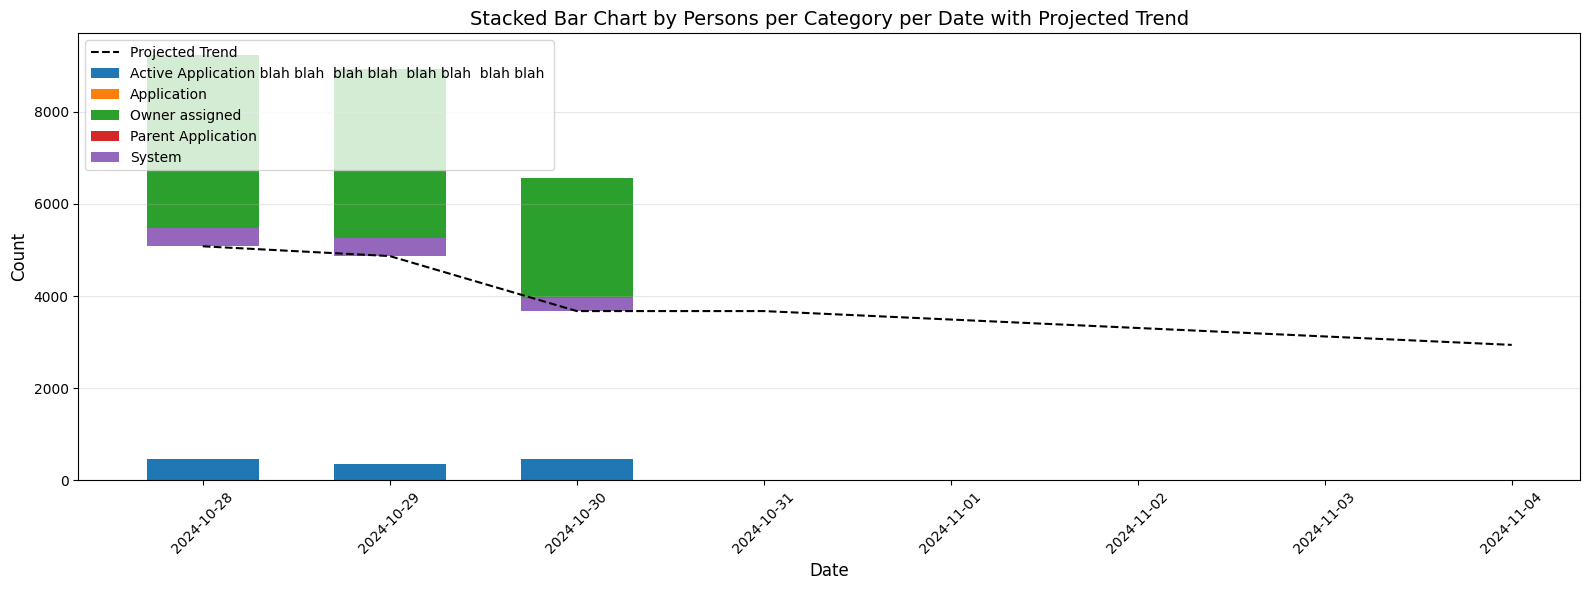

In [1]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

# Get all JSON files from the stats folder
json_files = glob.glob('./stats_breakdown/*.json')
data_by_date = {}

# Read and organize data by date
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates and convert data into a DataFrame
sorted_dates = sorted(data_by_date.keys())
all_data = []

for date in sorted_dates:
    date_data = data_by_date[date]
    for category, people_data in date_data.items():
        for person, count in people_data.items():
            all_data.append([date, category, person, count])

# Create DataFrame
df = pd.DataFrame(all_data, columns=['Date', 'Category', 'Person', 'Count'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df = df.groupby(['Date', 'Category']).sum().unstack(fill_value=0).stack().reset_index()

# Unique categories and dates for the chart
categories = df['Category'].unique()
dates = pd.to_datetime(sorted_dates, format='%Y%m%d')

# Prepare for plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(16, 6))
bar_width = 0.6

# Plot stacked bars for each category by date
for i, category in enumerate(categories):
    values = df[df['Category'] == category].pivot(index='Date', columns='Category', values='Count').fillna(0)
    bottom = np.zeros(len(dates)) if i == 0 else df.groupby('Date')['Count'].sum().values[:len(dates)]
    ax.bar(dates, values[category], bottom=bottom, label=category, width=bar_width)

# Calculate and plot the projected trend line
current_total = df.groupby('Date')['Count'].sum()
trend_dates = pd.date_range(dates[-1] + timedelta(days=1), periods=5, freq='D')
trend_values = np.linspace(current_total.values[-1], current_total.values[-1] * 0.8, len(trend_dates))  # 20% downward trend
ax.plot(np.append(dates, trend_dates), np.append(current_total.values, trend_values), 'k--', label='Projected Trend')

# Customize chart appearance
ax.set_title("Stacked Bar Chart by Persons per Category per Date with Projected Trend", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


C:\Users\ly2xx\AppData\Local\Temp\ipykernel_16548\2140919810.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(np.append(dates, trend_dates),


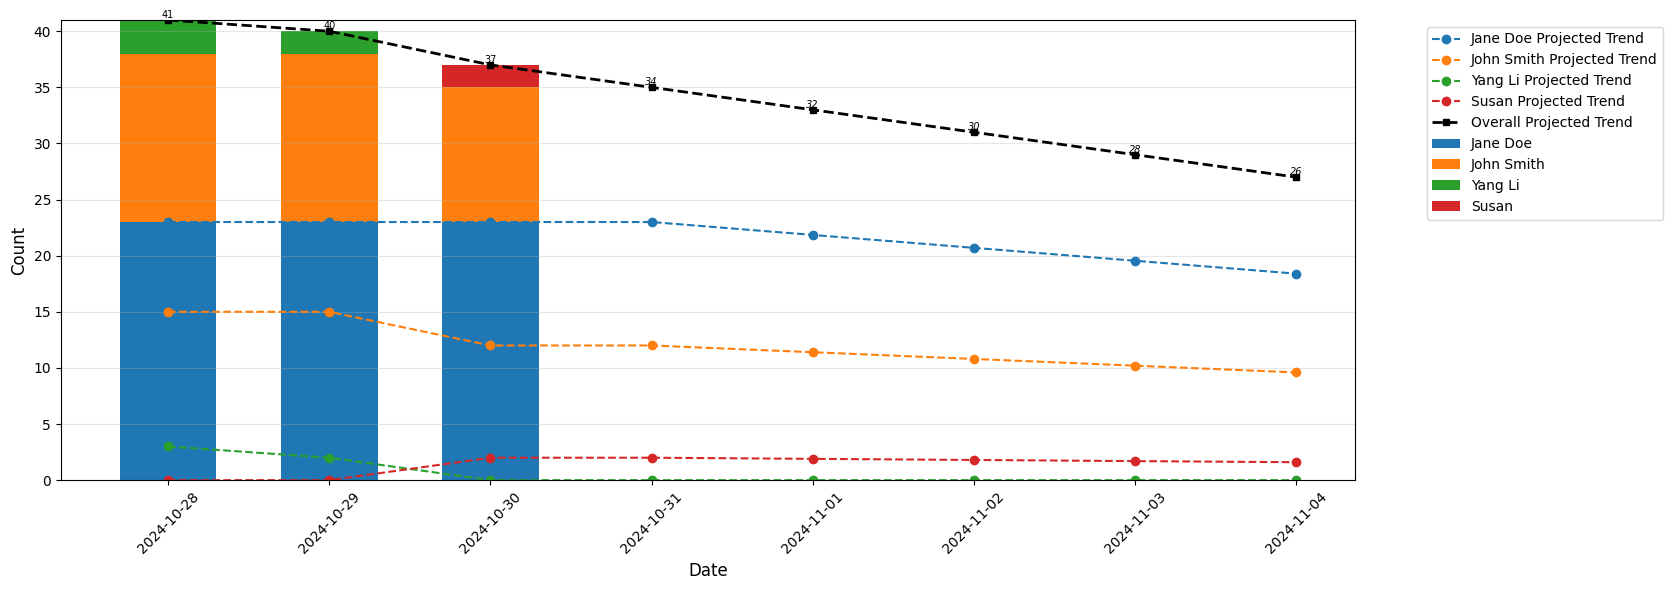

<Figure size 640x480 with 0 Axes>

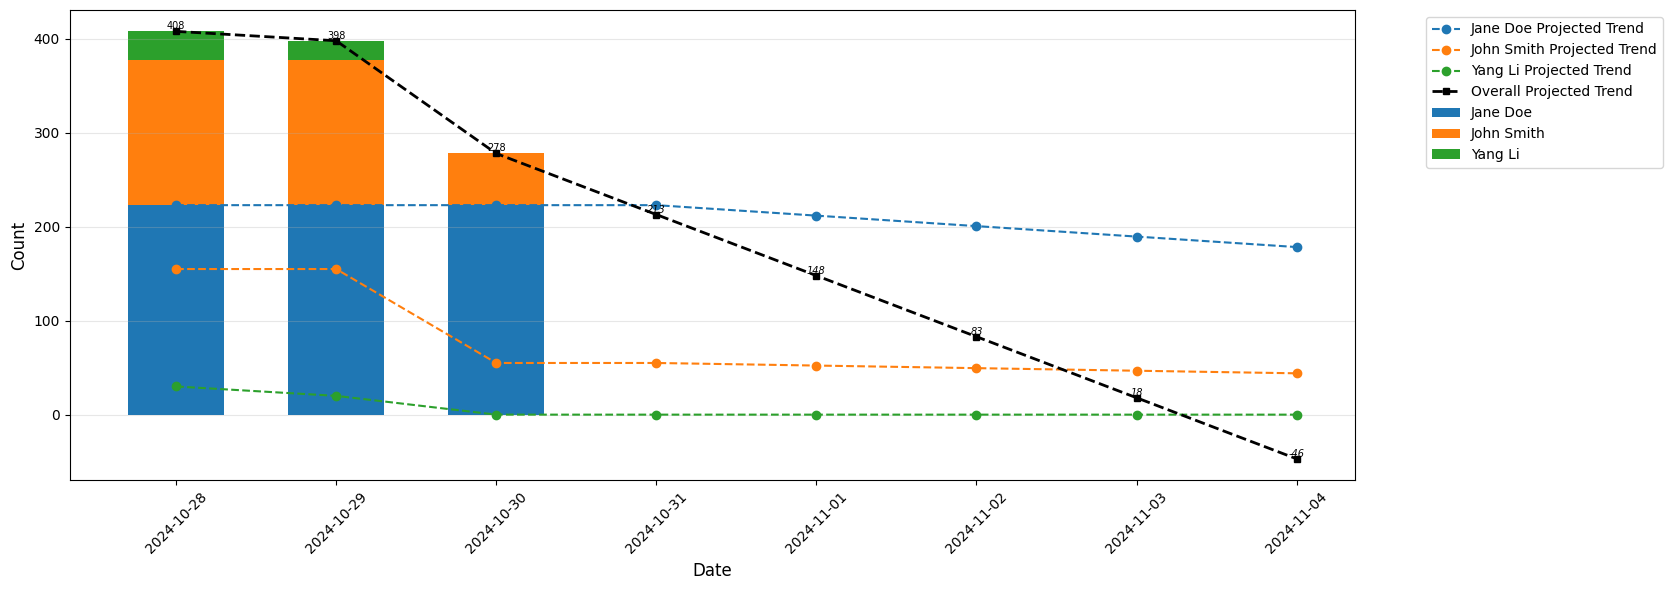

<Figure size 640x480 with 0 Axes>

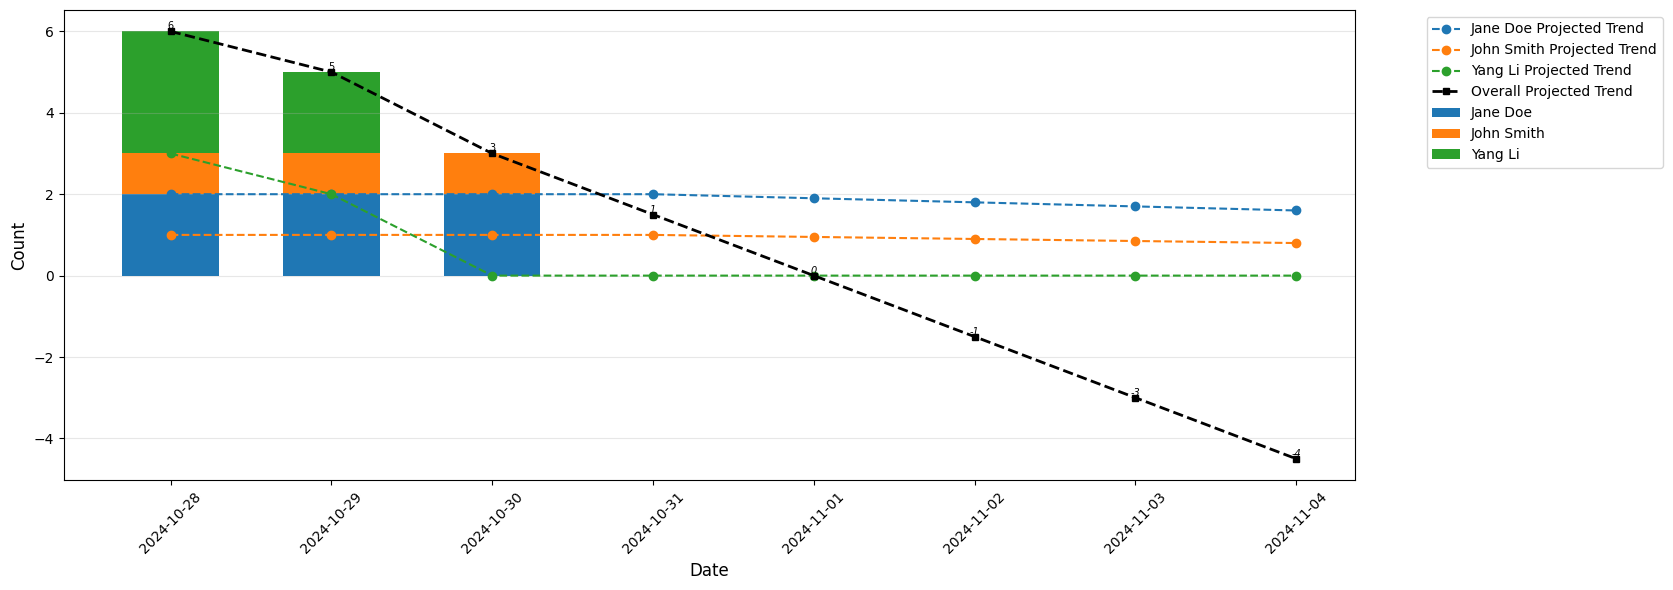

<Figure size 640x480 with 0 Axes>

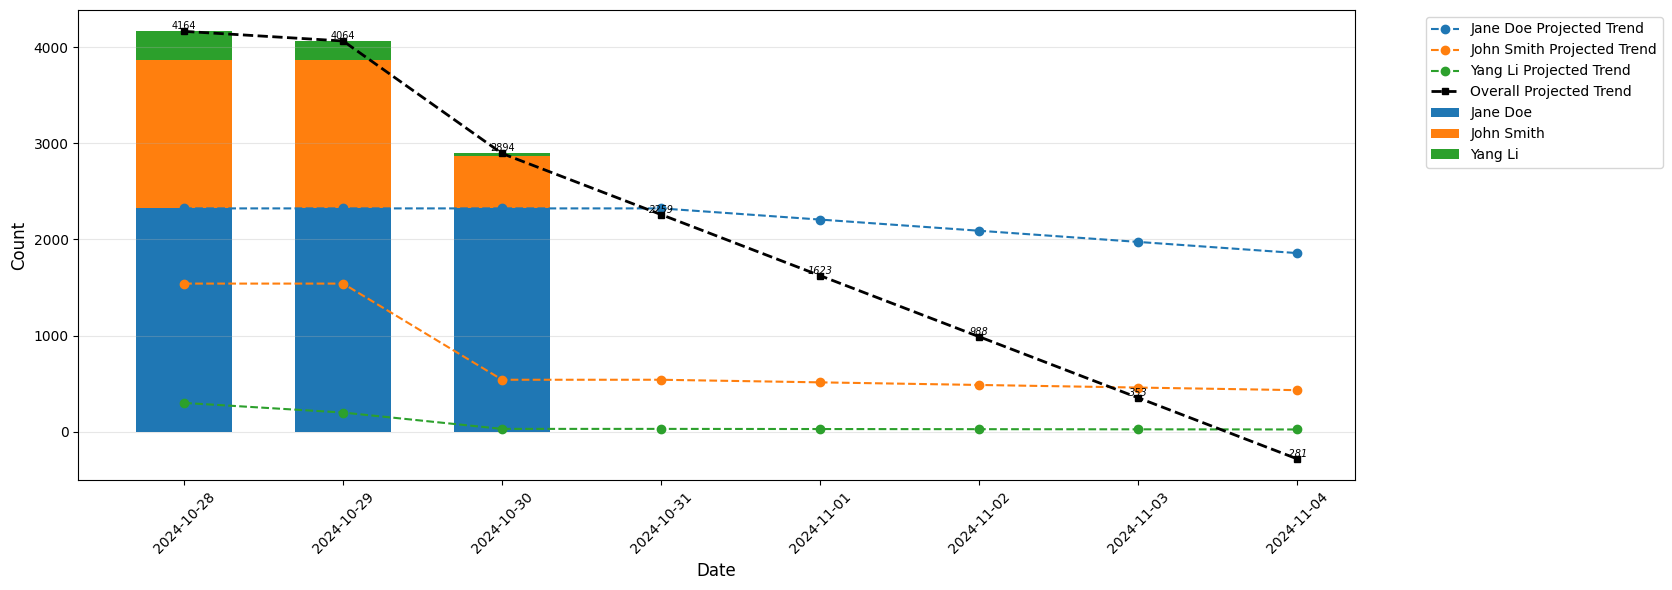

<Figure size 640x480 with 0 Axes>

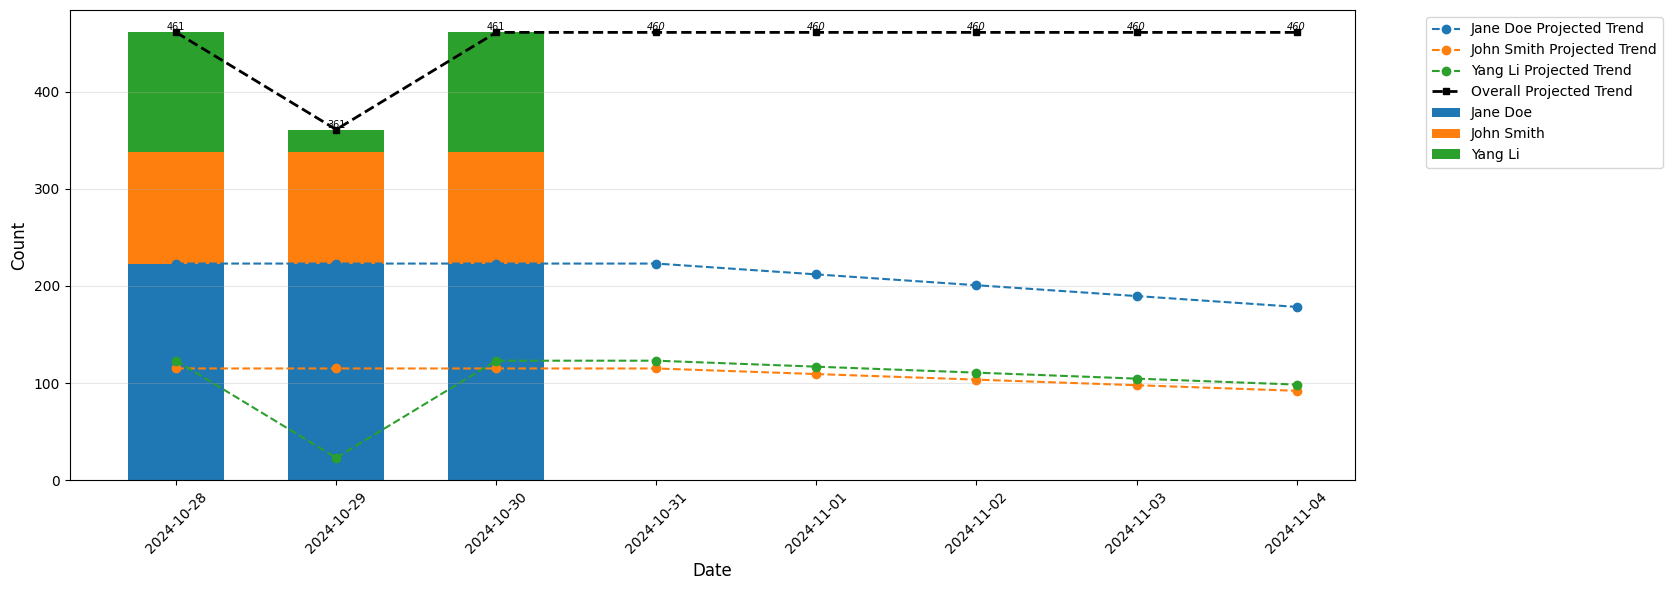

<Figure size 640x480 with 0 Axes>

In [10]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

# Get all JSON files from the stats folder
json_files = glob.glob('./stats_breakdown/*.json')
data_by_date = {}

# Read and organize data by date
for file in json_files:
    date = os.path.basename(file).split('_')[0]
    with open(file) as f:
        data = json.load(f)
        data_by_date[date] = data

# Sort dates and convert data into a DataFrame
sorted_dates = sorted(data_by_date.keys())
all_data = []

for date in sorted_dates:
    date_data = data_by_date[date]
    for category, people_data in date_data.items():
        for person, count in people_data.items():
            all_data.append([date, category, person, count])

# Create DataFrame
df = pd.DataFrame(all_data, columns=['Date', 'Category', 'Person', 'Count'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Generate a plot for each category
categories = df['Category'].unique()
for category in categories:
    category_df = df[df['Category'] == category]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(16, 6))
    bar_width = 0.6

    # Sort data by date and person
    dates = category_df['Date'].unique()
    people = category_df['Person'].unique()
    bottom = np.zeros(len(dates))
    
    # Stacked bar plot for each person in the category
    for person in people:
        person_values = category_df[category_df['Person'] == person].set_index('Date').reindex(dates, fill_value=0)['Count']
        ax.bar(dates, person_values, bottom=bottom, label=person, width=bar_width)
        bottom += person_values

        # Calculate projected trend for the next 5 days
        trend_dates = pd.date_range(dates[-1] + timedelta(days=1), periods=5, freq='D')
        last_value = person_values.values[-1] if len(person_values) > 0 else 0
        trend_values = np.linspace(last_value, last_value * 0.8, len(trend_dates))  # 20% downward trend
        
        # Plot trend line for the person
        ax.plot(np.append(dates, trend_dates), np.append(person_values.values, trend_values), '--', label=f'{person} Projected Trend', marker='o')
    
    # Calculate total values for each date
    total_values = np.zeros(len(dates))
    for person in people:
        person_values = category_df[category_df['Person'] == person].set_index('Date').reindex(dates, fill_value=0)['Count']
        total_values += person_values.values

    # Calculate overall projected trend for the next 5 days
    trend_dates = pd.date_range(dates[-1] + timedelta(days=1), periods=5, freq='D')
    last_total = total_values[-1]
    # Use linear regression to predict trend based on historical data
    z = np.polyfit(range(len(dates)), total_values, 1)
    slope = z[0]
    predicted_values = last_total + slope * np.arange(1, 6)  # Project based on historical trend

    # Plot overall trend line
    ax.plot(np.append(dates, trend_dates), 
            np.append(total_values, predicted_values),
            'r--', linewidth=2, label='Overall Projected Trend',
            marker='s', markersize=5, color='black')
    
    # After plotting the overall trend line, add value annotations
    for idx, (date, value) in enumerate(zip(dates, total_values)):
        ax.text(date, value, f'{int(value)}', 
                ha='center', va='bottom',
                color='black', fontsize=7)

    for idx, (date, value) in enumerate(zip(trend_dates, predicted_values)):
        ax.text(date, value, f'{int(value)}', 
                ha='center', va='bottom',
                color='black', style='italic', fontsize=7)


    # Customize chart appearance
    # ax.set_title(f"Stacked Bar Chart for '{category}' by Persons per Date with Projected Trend", fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)

    # Adjust layout and show/save plot
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)
    plt.show()  # Replace with 
    plt.savefig(f"{category}.png", dpi=300, bbox_inches='tight') 
    # if saving is preferred


In [13]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE

# Create new presentation
prs = Presentation()

# For each category image
for category in categories:
    # Add new slide with blank layout
    slide_layout = prs.slide_layouts[6]  # blank layout
    slide = prs.slides.add_slide(slide_layout)
    
    # Add banner shape
    banner = slide.shapes.add_shape(
        MSO_SHAPE.RECTANGLE,
        left=Inches(0),
        top=Inches(0),
        width=Inches(10),
        height=Inches(0.8)
    )
    
    # Set banner background color (grey)
    banner.fill.solid()
    banner.fill.fore_color.rgb = RGBColor(230, 230, 230)
    
    # Add title text box
    title = slide.shapes.add_textbox(
        left=Inches(0.2),
        top=Inches(0.2),
        width=Inches(9),
        height=Inches(0.5)
    )
    
    # Format title text
    title_frame = title.text_frame
    title_paragraph = title_frame.paragraphs[0]
    title_paragraph.text = f"Data Quality - {category}"
    title_run = title_paragraph.runs[0]
    title_run.font.size = Pt(20)
    title_run.font.bold = True
    title_run.font.color.rgb = RGBColor(0, 0, 0)
    
    # When adding to slides
    img_path = f"{category}.png"
    slide.shapes.add_picture(img_path, left=Inches(0.5), top=Inches(1.2), width=Inches(9), height=Inches(5))

# Save presentation
prs.save('data_quality_report.pptx')


add stats slide

In [29]:
from pptx import Presentation
from pptx.util import Inches

# Load presentation
prs = Presentation('sample.pptx')

# Add new slide
slide_layout = prs.slide_layouts[5]  # blank layout
new_slide = prs.slides.add_slide(slide_layout)

# Add title
title = new_slide.shapes.title
title.text = "Burndown by Category"

# Get today's date for file names
today = datetime.now().strftime('%Y%m%d')

# Define image positions (3 on top, 2 on bottom)
positions = [
    # Top row
    (Inches(0.5), Inches(1.5), Inches(4.5), Inches(2.5)),  # left
    (Inches(5.0), Inches(1.5), Inches(4.5), Inches(2.5)),  # middle
    (Inches(9.5), Inches(1.5), Inches(4.5), Inches(2.5)),  # right
    # Bottom row
    (Inches(2.75), Inches(4.5), Inches(4.5), Inches(2.5)), # left
    (Inches(7.25), Inches(4.5), Inches(4.5), Inches(2.5))  # right
]

# Add pictures for each category
for category, position in zip(sorted(categories), positions):
    img_path = f'burndown_{category}_{today}.png'
    left, top, width, height = position
    pic = new_slide.shapes.add_picture(img_path, left, top, width=width, height=height)

# Save presentation
prs.save('sample.pptx')


Reorder slides
https://stackoverflow.com/questions/56175678/rearrange-powerpoint-slides-automatically-using-python-pptx

In [46]:
import csv
from pptx import Presentation

# Read the CSV file
reorder_map = {}
with open('reorder.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        original_index, new_index = map(int, row)
        reorder_map[new_index] = original_index  # Reverse the mapping

# Open the PowerPoint presentation
prs = Presentation('data_quality_report.pptx')

# Create a new presentation
new_prs = Presentation()

# Copy slides to the new presentation in the specified order
for new_index in range(len(prs.slides)):
    # Get the original slide index for this new position
    original_index = reorder_map.get(new_index, new_index)
    source_slide = prs.slides[original_index]
    
    # Add a slide with the same layout
    dest_slide = new_prs.slides.add_slide(source_slide.slide_layout)
    
    # Copy all shapes from source to destination
    for shape in source_slide.shapes:
        elem = shape.element
        dest_slide.shapes._spTree.insert_element_before(elem, 'p:extLst')

# Save the new presentation
new_prs.save('reordered_data_quality_report.pptx')


template extractor

In [43]:
from pptx import Presentation

# Load the existing presentation
input_pptx = "sample.pptx"  # Replace with your actual file name
output_pptx = "sample_no_text.pptx"

# Open the presentation
prs = Presentation(input_pptx)

# Iterate through each slide in the presentation
for slide in prs.slides:
    # Iterate through each shape on the slide
    for shape in slide.shapes:
        # Check if the shape has text (i.e., a text frame)
        if shape.has_text_frame:
            # Clear all text in the text frame
            for paragraph in shape.text_frame.paragraphs:
                for run in paragraph.runs:
                    run.text = ""  # Remove text

# Save the modified presentation
prs.save(output_pptx)

print(f"Presentation saved as '{output_pptx}' without text content.")


Presentation saved as 'sample_no_text.pptx' without text content.


Extract text capable shapes

In [44]:
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.enum.text import MSO_AUTO_SIZE


def convert_pictures_to_textboxes(pptx_path):
    prs = Presentation(pptx_path)
    
    for slide in prs.slides:
        for shape in slide.shapes:
            if shape.shape_type == MSO_SHAPE_TYPE.PICTURE:
                # Get original picture properties
                left = shape.left
                top = shape.top
                width = shape.width
                height = shape.height
                
                # Remove picture shape
                shape_id = shape._element.shape_id
                shape._element.getparent().remove(shape._element)
                
                # Add textbox with same dimensions
                textbox = slide.shapes.add_textbox(left, top, width, height)
                
                # Configure textbox properties
                text_frame = textbox.text_frame
                text_frame.word_wrap = True
                text_frame.auto_size = MSO_AUTO_SIZE.TEXT_TO_FIT_SHAPE
    
    return prs

prs = convert_pictures_to_textboxes('sample_no_text.pptx')
prs.save('sample_allow_text.pptx')
